In [0]:
"""
In this notebook i try to give the simplest possible samples for stats tests.
I will try to explain with weights of groups of people.
This is a common sample because we can generate samples which are easily understandable.
Say our population is a city.
In this city we have schools and offices.
At scholls ,there are teenagers so their weights are forming teenager range weights.
At offices ,there are people ranging from 20-60 ages, so their mean weight is higher than
schools and also their variance is more.
"""
from scipy import stats
import matplotlib.pyplot as plt


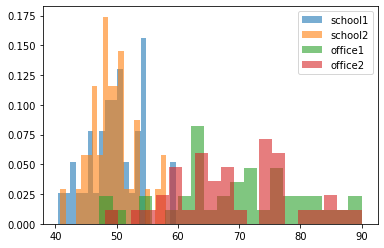

In [3]:
school_mean = 50
office_mean = 70
def get_school_sample(sample_size):
  rvs = stats.norm.rvs(loc=school_mean, scale=5, size=(sample_size))
  return rvs

def get_office_sample(sample_size):
  rvs = stats.norm.rvs(loc=office_mean, scale=10, size=(sample_size))
  return rvs

school1 = get_school_sample(40)
school2 = get_school_sample(40)
office1 = get_office_sample(40)
office2 = get_office_sample(40)
alpha = 0.6
plt.hist(school1,label="school1",bins=20,alpha=alpha,density=True)
plt.hist(school2,label="school2",bins=20,alpha=alpha,density=True)

plt.hist(office1,label="office1",bins=20,alpha=alpha,density=True)
plt.hist(office2,label="office2",bins=20,alpha=alpha,density=True)
plt.legend()
plt.show()

In [0]:
"""
Documentaion :
scipy.stats.ttest_1samp
This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

"""

In [4]:
#Let’s say we have samples and we want to see if their mean is our school mean
print( stats.ttest_1samp(get_school_sample(20), school_mean) )
print( stats.ttest_1samp(get_school_sample(40), school_mean) )
#pvalue are high, means this sample is likely  taken from a school population
#null hypothesis is true,means are same

Ttest_1sampResult(statistic=1.4141922116611674, pvalue=0.17348332784140452)
Ttest_1sampResult(statistic=-0.7200454230533849, pvalue=0.4757905019252805)


In [5]:
print(stats.ttest_1samp(get_office_sample(20), school_mean))
print(stats.ttest_1samp(get_office_sample(40), school_mean))
#pvalue are very low, means this sample is likely NOT taken from a school population
#null hypothesis is fale,means are NOT same

Ttest_1sampResult(statistic=19.298163548224316, pvalue=6.09069745247081e-14)
Ttest_1sampResult(statistic=13.814694471154143, pvalue=1.3170695132179848e-16)


In [6]:
#Let's compare different schools
#Our null hypothesis in this case is that there is no statistically significant difference in the mean of schools.
stats.ttest_ind(get_school_sample(40), get_school_sample(40))
#pvalue high, we fail to reject null hypothesis , means are same

Ttest_indResult(statistic=-0.2626612895788488, pvalue=0.7935041725437011)

In [14]:
#Let's compare same value , no difference between 
#Our null hypothesis in this case is that there is no statistically significant difference in the mean of schools.
set1 = get_school_sample(40)
stats.ttest_ind(set1,set1 )

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [7]:
#Our null hypothesis in this case is that there is no statistically significant difference in the mean of schools and office
stats.ttest_ind(get_school_sample(40), get_office_sample(40))
#pvalue low, we  reject null hypothesis , means are NOT same

Ttest_indResult(statistic=-9.567216713884685, pvalue=8.60475792821767e-15)

In [0]:
#Paired T-Test
#Lets say we gave different foods for lunch to schools,we want to understand if this has an effect on weights
#The null hypothesis is that the new special lunch system  has no effect on weight.



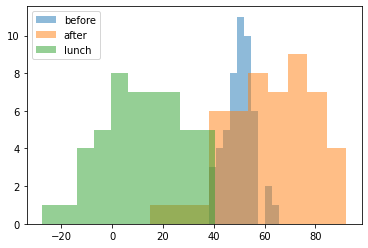

Ttest_relResult(statistic=-5.272243685988046, pvalue=3.0220383498676905e-06)

In [19]:
#here we add some noise(result of our new lunch system),here we add a strong effect
before = get_school_sample(50)
lunch = stats.norm.rvs(loc=10, scale=15, size=(50))
after = before + lunch
plt.hist(before,label="before",alpha=0.5)
plt.hist(after,label="after",alpha=0.5)
plt.hist(lunch,label="lunch",alpha=0.5)
plt.legend()
plt.show()
stats.ttest_rel(before, after)
#pvalue so small, it means this treatment is having an effect
#reject null hypothesis, treatment(new lunch system)
#Think this lunch as fast food it changed the weights heavily

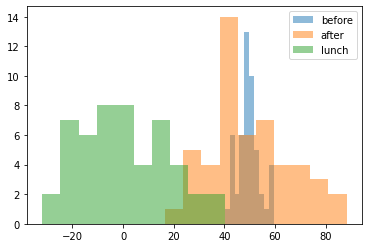

Ttest_relResult(statistic=-0.21334391897603042, pvalue=0.8319439115393832)

In [21]:
before = get_school_sample(50)
lunch = stats.norm.rvs(loc=1, scale=15, size=(50))
after = before + lunch
plt.hist(before,label="before",alpha=0.5)
plt.hist(after,label="after",alpha=0.5)
plt.hist(lunch,label="lunch",alpha=0.5)
plt.legend()
plt.show()
stats.ttest_rel(before, after)
#pvalue so small, it means this treatment is having an effect
#reject null hypothesis, treatment(new lunch system) has effect
#Think this lunch as balnced food it did not change the weights 